### This notebook is to plot hysteresis patterns for all 7 of my summer storms

Import all data -  Constituents, water surface elevation (WSE) and sonde turbidity and fDOM to plot hysteresis

In [79]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# directories where the CSV files are stored
storm_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms'
sonde_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/sonde'
WSE_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/WSE'

# dictionaries to store the data frames
storms = {}
sondes = {}
WSE = {}

# iterate over all files in the directory
# storms:
for filename in os.listdir(storm_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(storm_directory, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date/Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date/Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index   
        df = df.drop(columns=['Date/Time', 'WSE', 'Q', ])   # drop the original date 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        storms[key] = df                                    # store the data frame in the dictionary

# sondes:
for filename in os.listdir(sonde_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(sonde_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])
        df['Date_Time'] = pd.to_datetime(df['Date (MM/DD/YYYY)'] + ' ' + df['Time (HH:mm:ss)'])
        df = df.drop(columns=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])  # drop the original date and time columns
        df = df.set_index('Date_Time')                                  # set date time as the index
        df = df.dropna(how='all', axis=1)                               # drop columns where all values are NaN
        df = df.resample('1T').interpolate()                            # resample to 1-minute frequency and interpolate missing values
        key = filename[:-4]
        sondes[key] = df

# WSE:
for filename in os.listdir(WSE_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(WSE_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date_Time'])
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        df = df.resample('1T').interpolate()                # resampling with a 1 min interval
        key = filename[:-4]
        WSE[key] = df

In [80]:
storms.keys()

dict_keys(['st1_down', 'st1_up', 'st2_down', 'st3_down', 'st4_down', 'st4_up', 'st5_down', 'st5_up', 'st6_up', 'st7_down', 'st7_up'])

Cleanup the data - First, I need to add the water depth to each dataframe where they match and convert the WSEs to actual depths

In [81]:
# 2021
WSE['WSE_2021']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2021']['P2C']))* 100 # top elev - WSE = depth, in cm
WSE['WSE_2021']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2021']['P3C']))* 100 
# 2022
WSE['WSE_2022']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2022']['P2C']))* 100 
WSE['WSE_2022']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2022']['P3C']))* 100 
# 2023
WSE['WSE_2023']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2023']['P2C']))* 100 
WSE['WSE_2023']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2023']['P3C']))* 100 

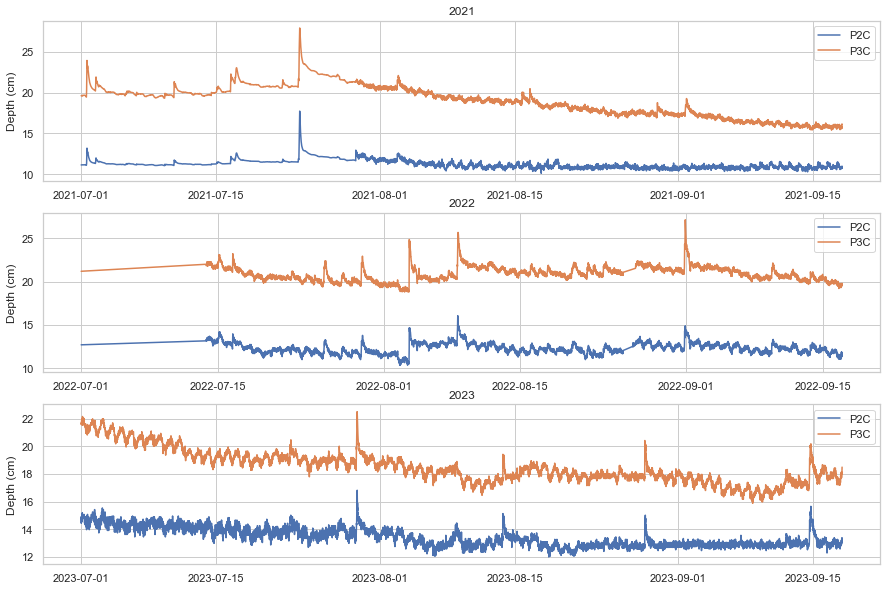

In [82]:
# plot depth time series for each year 
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False)
sns.set_theme(style="whitegrid")

# filter for summer months
summer2021 = WSE['WSE_2021'][WSE['WSE_2021'].index.month.isin([7, 8, 9])]
summer2022 = WSE['WSE_2022'][WSE['WSE_2022'].index.month.isin([7, 8, 9])]
summer2023 = WSE['WSE_2023'][WSE['WSE_2023'].index.month.isin([7, 8, 9])]

ax[0].plot(summer2021.index, summer2021['P2C_depth'], label='P2C')
ax[0].plot(summer2021.index, summer2021['P3C_depth'], label='P3C')
ax[0].set_title('2021')
ax[0].set_ylabel('Depth (cm)')
ax[0].legend()

ax[1].plot(summer2022.index, summer2022['P2C_depth'], label='P2C')
ax[1].plot(summer2022.index, summer2022['P3C_depth'], label='P3C')
ax[1].set_title('2022')
ax[1].set_ylabel('Depth (cm)')
ax[1].legend()

ax[2].plot(summer2023.index, summer2023['P2C_depth'], label='P2C')
ax[2].plot(summer2023.index, summer2023['P3C_depth'], label='P3C')
ax[2].set_title('2023')
ax[2].set_ylabel('Depth (cm)')
ax[2].legend()

plt.show()

In [83]:
# merge the dataframes on the index - need to make sure storms coincide with the year of the WSE data!

# downstream reach
storms['st1_down'] = storms['st1_down'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st2_down'] = storms['st2_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st3_down'] = storms['st3_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st4_down'] = storms['st4_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_down'] = storms['st5_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_down'] = storms['st7_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
# upstream reach
storms['st1_up'] = storms['st1_up'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st4_up'] = storms['st4_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_up'] = storms['st5_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st6_up'] = storms['st6_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_up'] = storms['st7_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')

In [85]:
storms['st7_down']

,SS (uL/L),DOC (mg/L),POC (mg/L),N (mg/L),LAB ID,fDOM,Turbidity,P2C,P3C,P2C_depth,P3C_depth
Date_Time,,,,,,,,,,,
2023-09-14 17:52:00,63.87,5.401,5.339,1.174,484,24.106,13.498,2723.163935,2724.188253,15.493520,20.025333
2023-09-14 18:07:00,75.40,4.864,4.613,1.682,485,22.470,13.876,2723.162772,2724.189287,15.377227,20.128667
2023-09-14 18:22:00,70.75,4.632,4.384,0.856,486,23.452,12.424,2723.158577,2724.187067,14.957667,19.906667
2023-09-14 18:27:00,61.61,NaN,NaN,NaN,-,23.330,12.076,2723.157800,2724.185900,14.880000,19.790000
2023-09-14 18:37:00,82.60,4.156,4.110,1.319,487,23.470,11.150,2723.157605,2724.185200,14.860467,19.720000
2023-09-14 18:52:00,54.12,3.289,NaN,NaN,488,24.810,9.956,2723.157643,2724.185200,14.864333,19.720000
2023-09-14 19:09:00,NaN,8.729,3.764,0.522,489,29.200,8.848,2723.157334,2724.184120,14.833400,19.612000


Defining Functions - These are the functions I am going to be calling to plot my hysteresis patters

In [56]:
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    # Ensure z is a 1D array with the same length as x and y
    if z is None:
        z = np.arange(len(x))  # Use the index of the point as the color
    elif not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z] * len(x))
    else:
        z = np.asarray(z)

    # Remove NaN values
    mask = ~np.isnan(y)
    x, y = x[mask], y[mask]

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    ax = plt.gca()
    ax.add_collection(lc)

    return lc

# Storm Hysteresis Plots

Storm 1 - Downstream

In [ ]:
# single plot - downstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['P3C_depth']))
    num_points = len(storms['st1_down']['P3C_depth'])
    colorline(storms['st1_down']['P3C_depth'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['P3C_depth'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # Close the figure to free up memory

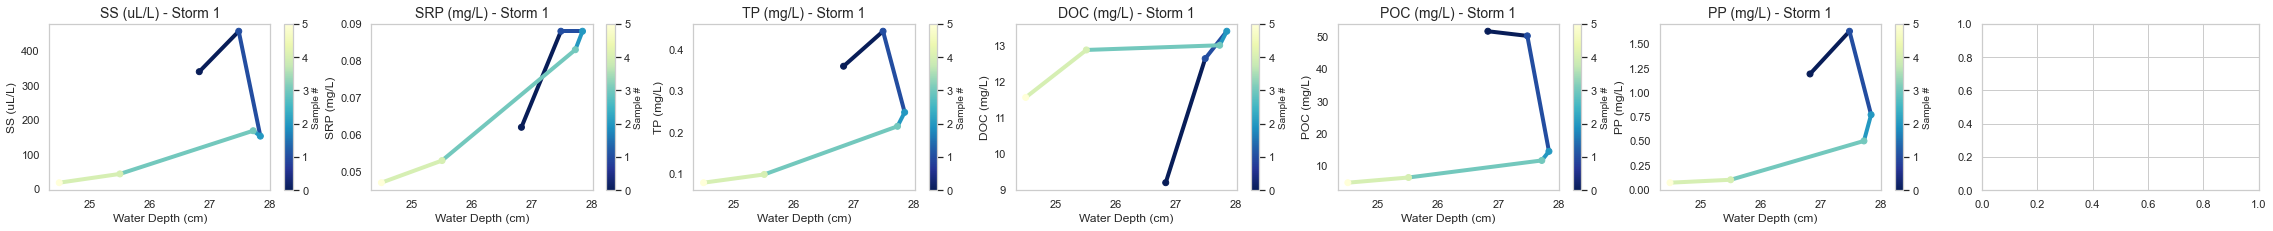

In [43]:
# All constituents - downstream - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['P3C_depth']))
    num_points = len(storms['st1_down']['P3C_depth'])
    colorline(storms['st1_down']['P3C_depth'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['P3C_depth'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 1 - Upstream

In [ ]:
# single plot - upstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['P3C_depth']))
    num_points = len(storms['st1_up']['P3C_depth'])
    colorline(storms['st1_up']['P3C_depth'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['P3C_depth'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

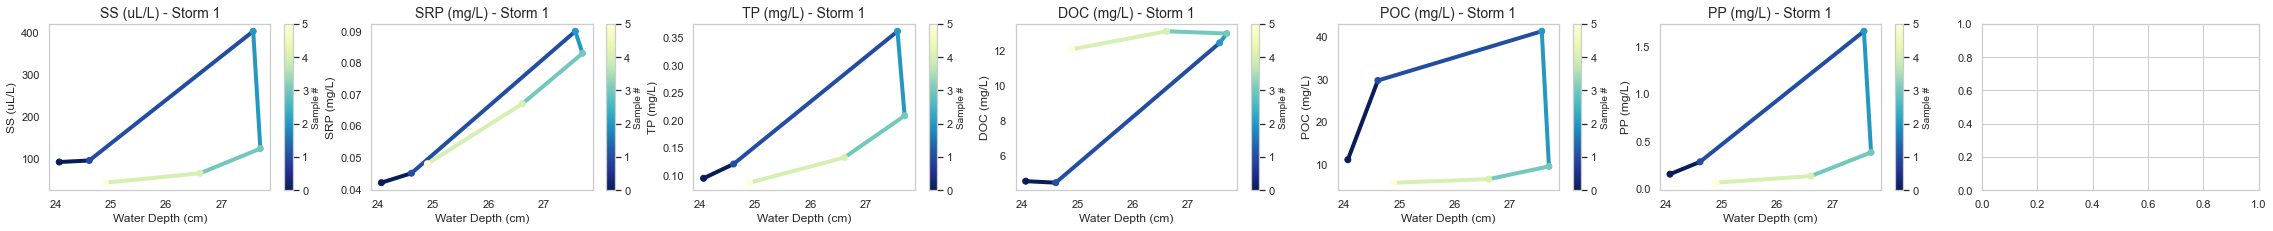

In [45]:
# All constituents - downstream - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['P3C_depth']))
    num_points = len(storms['st1_up']['P3C_depth'])
    colorline(storms['st1_up']['P3C_depth'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['P3C_depth'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 2 - Downstream

In [ ]:
# single plot - downstream reach - storm 2
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st2_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st2_down'][constituent])
    x = storms['st2_down']['P3C_depth'][mask]
    y = storms['st2_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 2', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

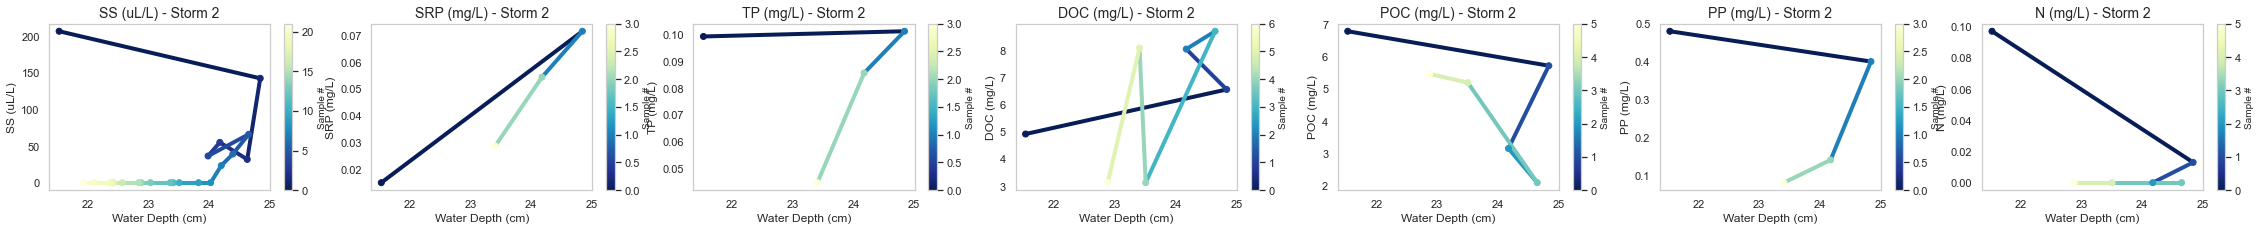

In [47]:
# All constituents - downstream - storm 2
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st2_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st2_down'][constituent])
    x = storms['st2_down']['P3C_depth'][mask]
    y = storms['st2_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 2', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 3 - Downstream

In [ ]:
# single plot - downstream reach - storm 3
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st3_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st3_down'][constituent])
    x = storms['st3_down']['P3C_depth'][mask]
    y = storms['st3_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 3', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

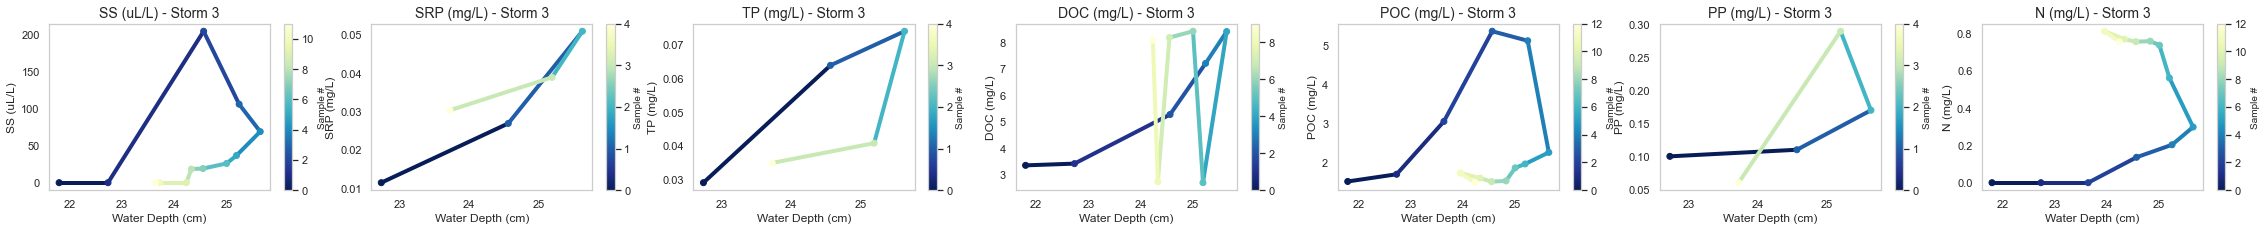

In [58]:
# All constituents - downstream - storm 3
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st3_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st3_down'][constituent])
    x = storms['st3_down']['P3C_depth'][mask]
    y = storms['st3_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 3', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 4 - Downstream

In [ ]:
# single plot - downstream reach - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_down'][constituent])
    x = storms['st4_down']['P3C_depth'][mask]
    y = storms['st4_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

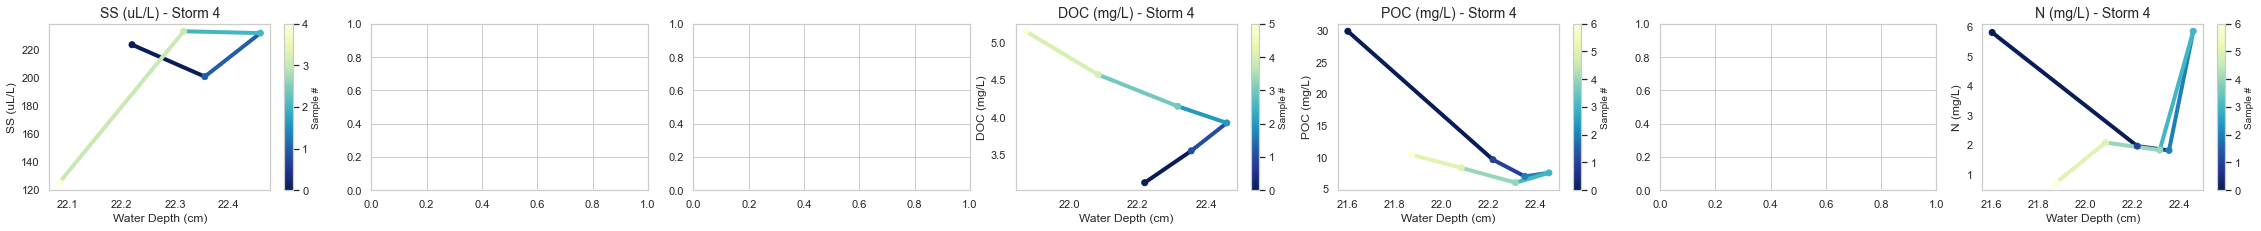

In [61]:
# All constituents - downstream - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st4_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st4_down'][constituent])
    x = storms['st4_down']['P3C_depth'][mask]
    y = storms['st4_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 4', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 4 - Upstream

In [ ]:
# single plot - upstream reach - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['P3C_depth'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

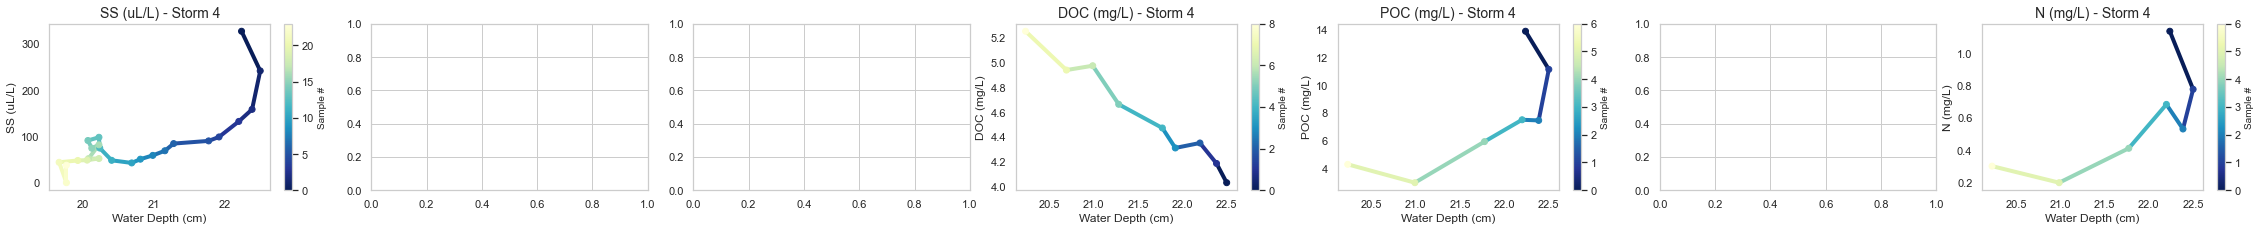

In [63]:
# All constituents - upstream - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st4_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['P3C_depth'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 4', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 5 - Downstream

In [ ]:
# single plot - downstream reach - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_down'][constituent])
    x = storms['st5_down']['P3C_depth'][mask]
    y = storms['st5_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

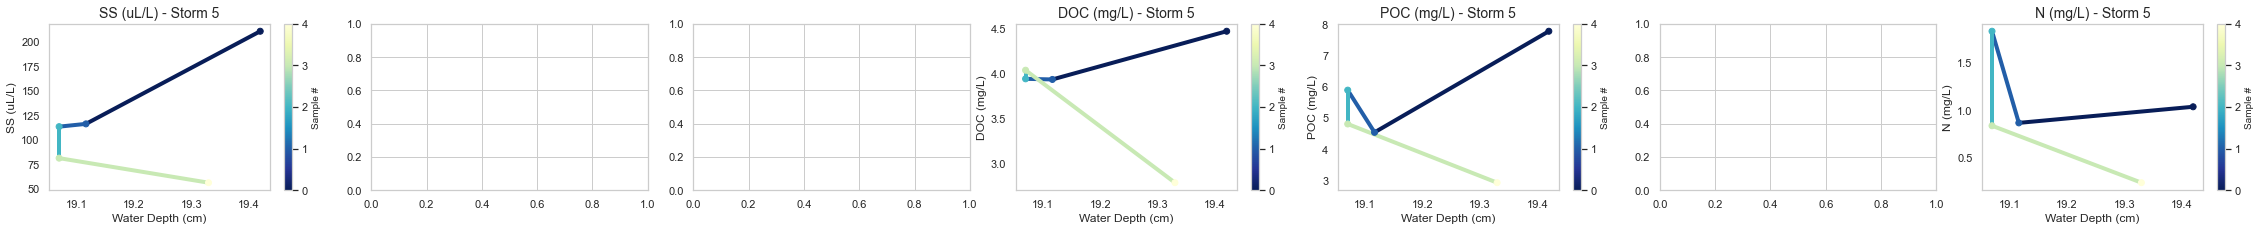

In [66]:
# All constituents - downstream - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st5_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st5_down'][constituent])
    x = storms['st5_down']['P3C_depth'][mask]
    y = storms['st5_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 5', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 5 - Upstream

In [ ]:
# single plot - upstream reach - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_up'][constituent])
    x = storms['st5_up']['P3C_depth'][mask]
    y = storms['st5_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

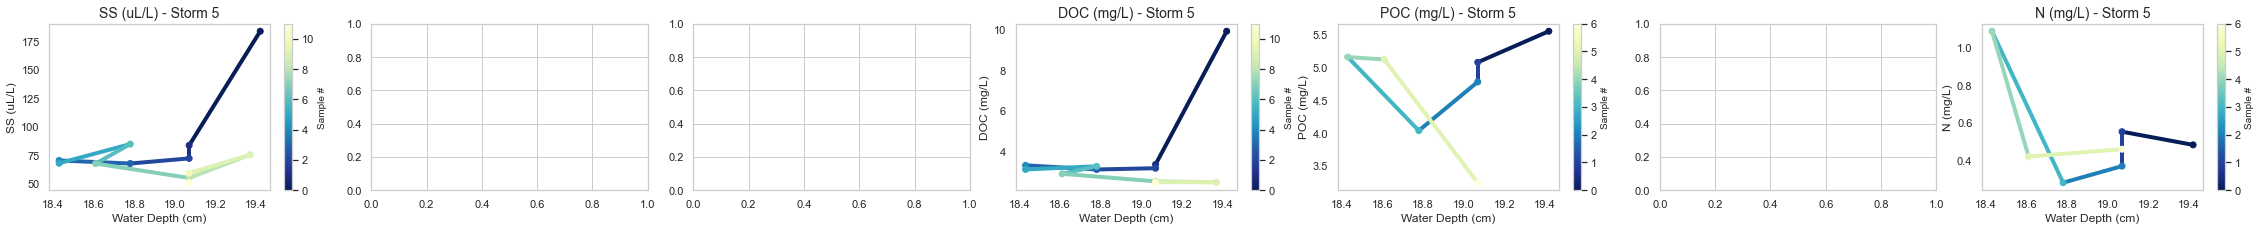

In [68]:
# All constituents - upstream - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st5_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st5_up'][constituent])
    x = storms['st5_up']['P3C_depth'][mask]
    y = storms['st5_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 5', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 6 - Upstream

In [ ]:
# single plot - upstream reach - storm 6
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st6_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st6_up'][constituent])
    x = storms['st6_up']['P3C_depth'][mask]
    y = storms['st6_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 6', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

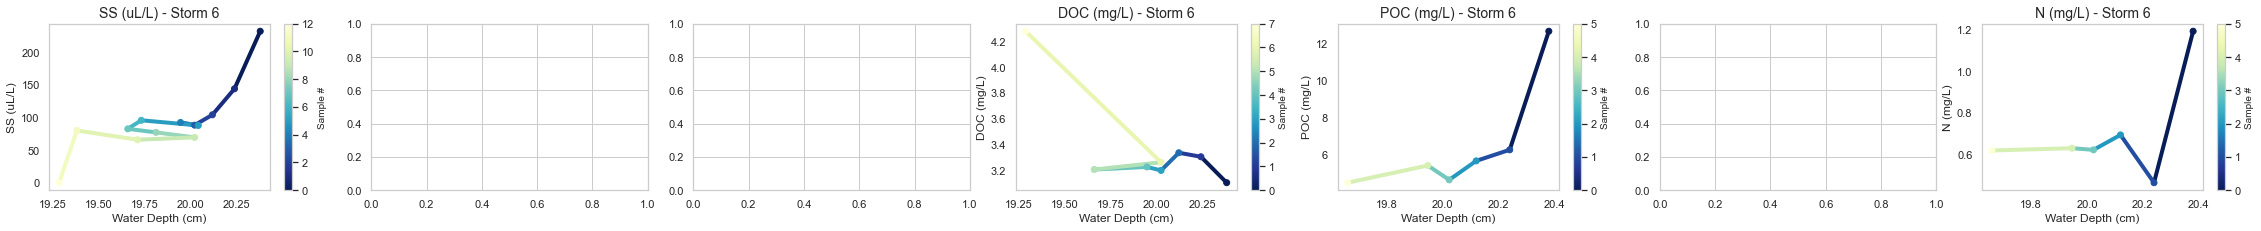

In [72]:
# All constituents - upstream - storm 6
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st6_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st6_up'][constituent])
    x = storms['st6_up']['P3C_depth'][mask]
    y = storms['st6_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 6', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 7 - Downstream

In [ ]:
# single plot - downstream reach - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st7_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st7_down'][constituent])
    x = storms['st7_down']['P3C_depth'][mask]
    y = storms['st7_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 7', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

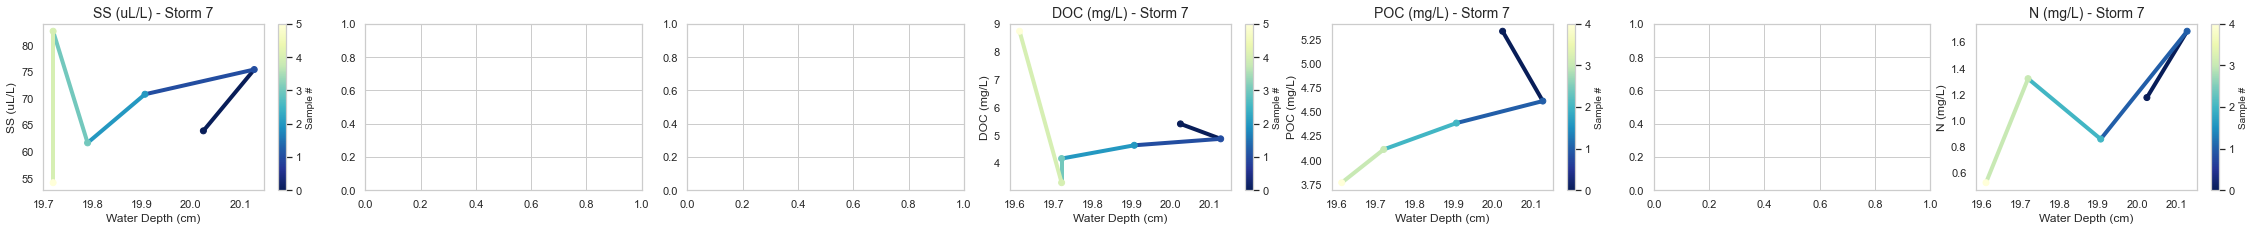

In [87]:
# All constituents - downstream - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st7_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st7_down'][constituent])
    x = storms['st7_down']['P3C_depth'][mask]
    y = storms['st7_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 7', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 7 - Upstream

In [ ]:
# single plot - upstream reach - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st7_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st7_up'][constituent])
    x = storms['st7_up']['P3C_depth'][mask]
    y = storms['st7_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 7', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

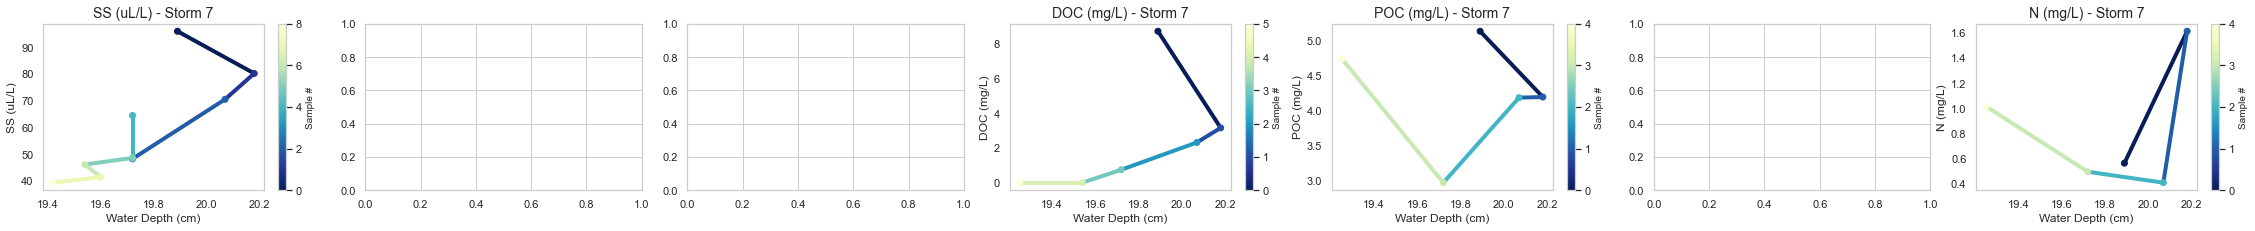

In [90]:
# All constituents - upstream - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st7_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st7_up'][constituent])
    x = storms['st7_up']['P3C_depth'][mask]
    y = storms['st7_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 7', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()